In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

In [6]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [7]:
dta['affair'] = (dta.affairs>0).astype(int)

In [8]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [9]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
dta.shape

(6366, 10)

In [11]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [12]:
dta.drop(['affairs'],axis=1,inplace=True)

In [13]:
dta.describe().round(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00
mean,4.11,29.08,9.01,1.40,2.43,14.21,3.42,3.85,0.32
std,0.96,6.85,7.28,1.43,0.88,2.18,0.94,1.35,0.47
min,1.00,17.50,0.50,0.00,1.00,9.00,1.00,1.00,0.00
25%,4.00,22.00,2.50,0.00,2.00,12.00,3.00,3.00,0.00
50%,4.00,27.00,6.00,1.00,2.00,14.00,3.00,4.00,0.00
75%,5.00,32.00,16.50,2.00,3.00,16.00,4.00,5.00,1.00
max,5.00,42.00,23.00,5.50,4.00,20.00,6.00,6.00,1.00


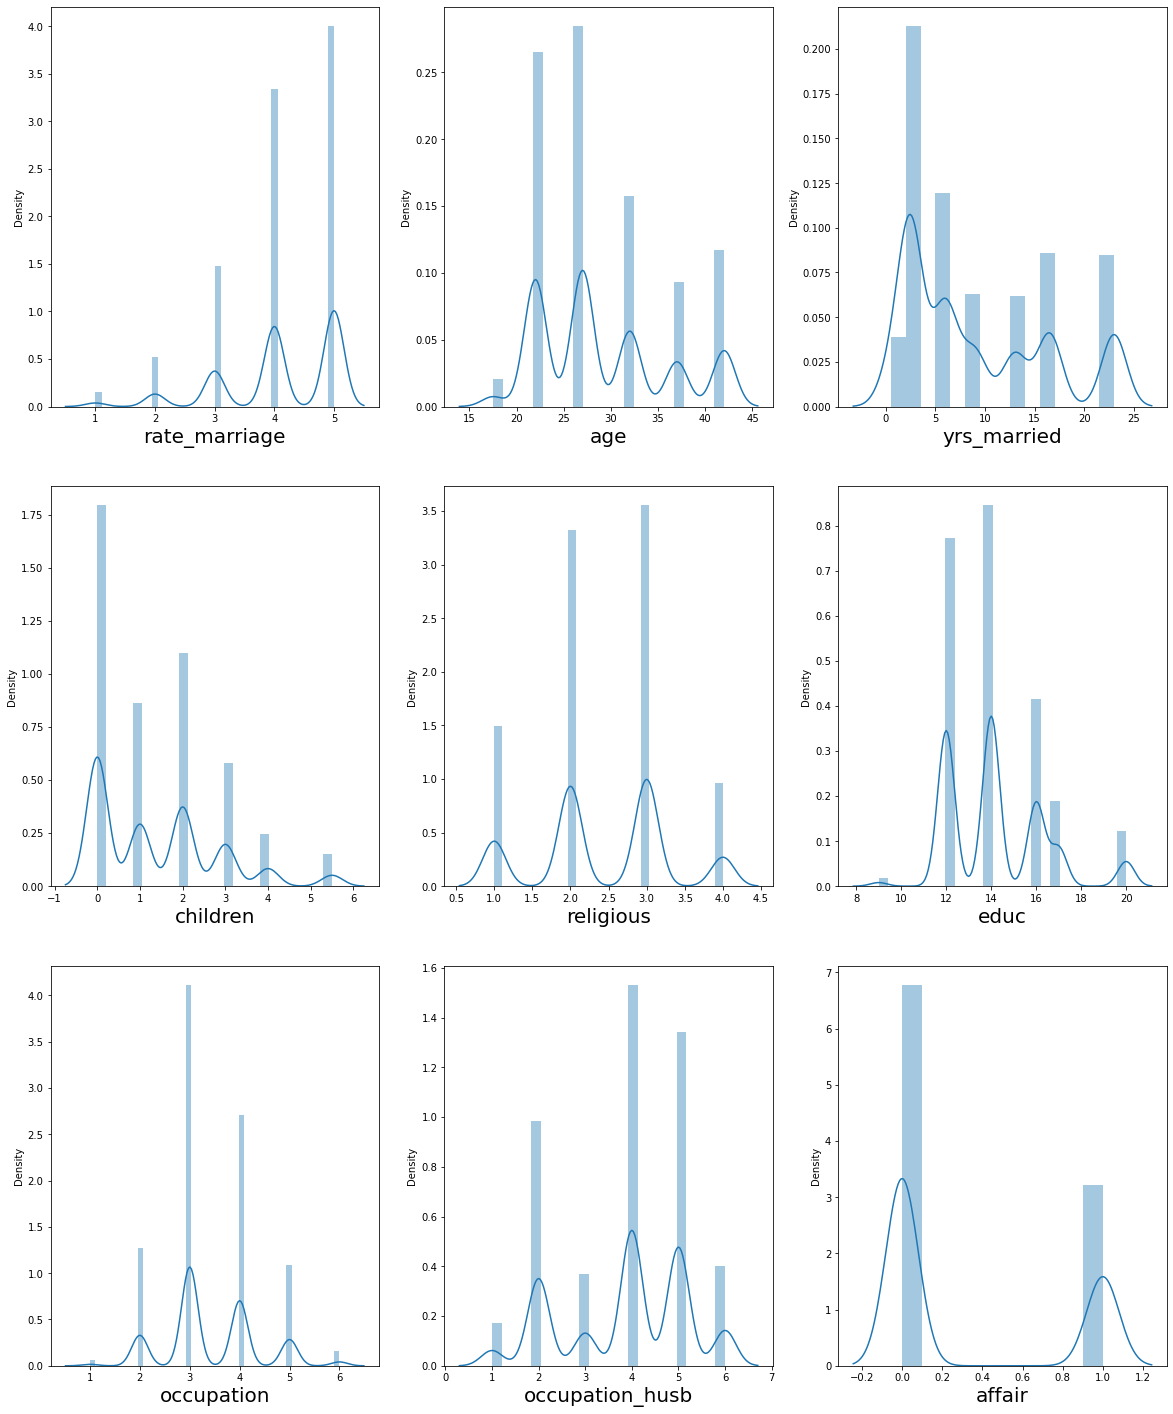

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=len(dta) :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

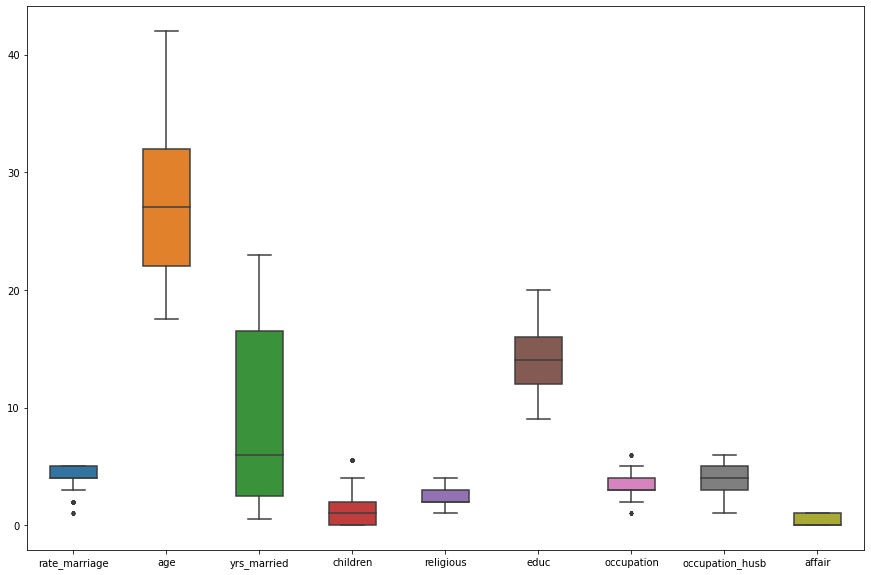

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

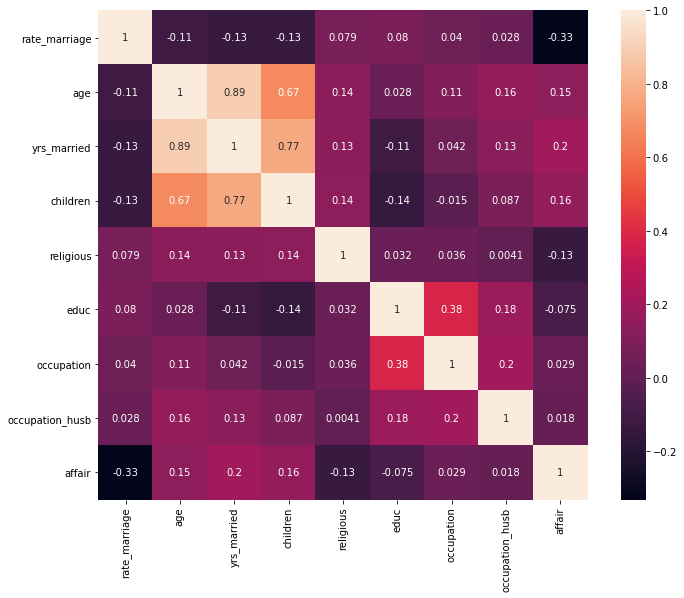

In [16]:
corrmat = dta.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True);

In [17]:
dta.groupby(['rate_marriage'],as_index=False)['affair'].mean().sort_values(by='affair',ascending=False)

,rate_marriage,affair
0,1.0,0.747475
1,2.0,0.635057
2,3.0,0.550856
3,4.0,0.322926
4,5.0,0.181446


In [18]:
dta.groupby(['rate_marriage'],as_index=False)['age','affair'].mean().sort_values(by='affair',ascending=False).round(3)

,rate_marriage,age,affair
0,1.0,33.823,0.747
1,2.0,30.471,0.635
2,3.0,30.008,0.551
3,4.0,28.857,0.323
4,5.0,28.575,0.181


In [19]:
dta.groupby('affair',as_index=False).mean().round()

,affair,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,0,4.0,28.0,8.0,1.0,3.0,14.0,3.0,4.0
1,1,4.0,31.0,11.0,2.0,2.0,14.0,3.0,4.0


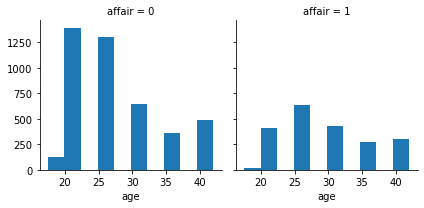

In [20]:
grid = sns.FacetGrid(dta,col='affair')
grid.map(plt.hist,'age')

Text(0, 0.5, 'Frequency')

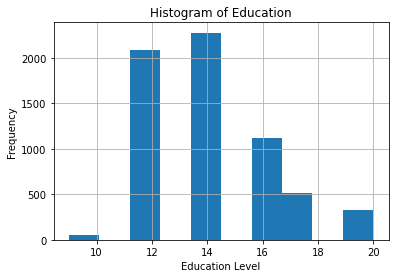

In [21]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

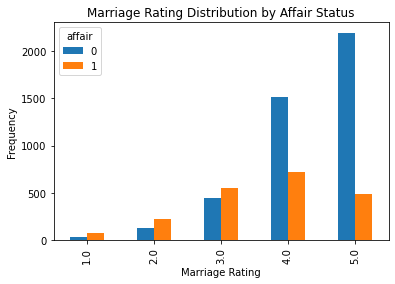

In [22]:
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Compare between male & female who are smoker and not')

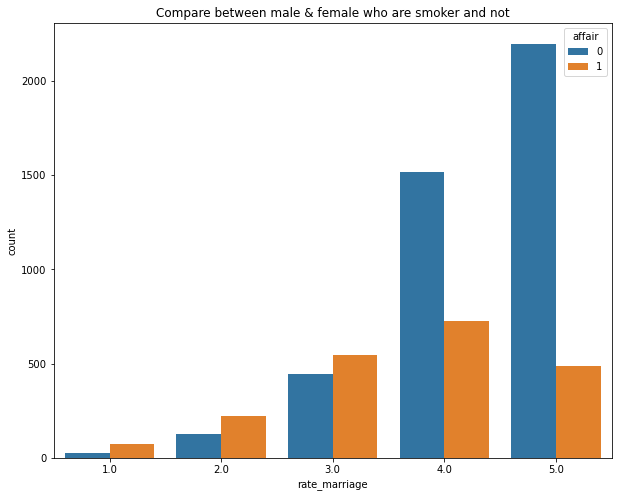

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x='rate_marriage',hue='affair',data=dta)
plt.title('Compare between male & female who are smoker and not')

Text(0.5, 1.0, 'Compare between male & female who are smoker and not')

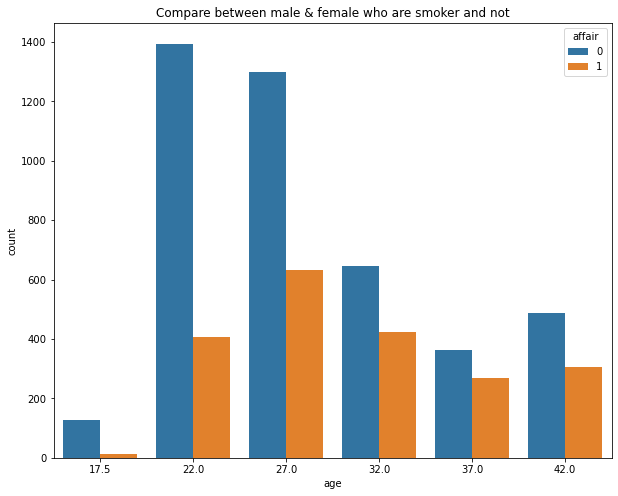

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='age',hue='affair',data=dta)
plt.title('Compare between male & female who are smoker and not')

In [25]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Split the data into training and test set
(5092, 17)
(5092,)
(1274, 17)
(1274,)


In [26]:
y_test[1115]

0.0

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [28]:
logreg.score(X_train,y_train)

0.7268263943440691

In [29]:
logreg.score(X_test,y_test)

0.728414442700157

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,classification_report,roc_auc_score

In [32]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[759,  90],
       [256, 169]], dtype=int64)

In [33]:
f1 = f1_score(y_test,y_pred)
f1

0.49415204678362573

In [34]:
precision = precision_score(y_test,y_pred)
precision

0.6525096525096525

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       849
         1.0       0.65      0.40      0.49       425

    accuracy                           0.73      1274
   macro avg       0.70      0.65      0.65      1274
weighted avg       0.72      0.73      0.71      1274



In [36]:
print(accuracy_score(y_test,y_pred))

0.728414442700157


In [37]:
print(roc_auc_score(y_test,y_pred))

0.6458199958428602


In [41]:
probs = logreg.predict_proba(X_test)
probs

array([[0.68159828, 0.31840172],
       [0.50453228, 0.49546772],
       [0.70018307, 0.29981693],
       ...,
       [0.74949717, 0.25050283],
       [0.62470177, 0.37529823],
       [0.60510095, 0.39489905]])

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

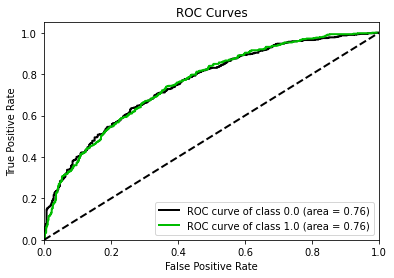

In [42]:
import matplotlib.pyplot as plt
import scikitplot
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])

In [43]:
import pickle

filename = 'woman affair.pkl'
pickle.dump(dta, open(filename, 'wb'))

In [44]:
print(logreg.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]])))

[[0.67892181 0.32107819]]
